In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
combi = pd.read_table('Historical_combi2.csv',delimiter =';')

combi=combi.fillna(0)
print(combi)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn import linear_model
import statsmodels.api as sm
#X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
#Y = df['Stock_Index_Price']
 
# with sklearn
#regr = linear_model.LinearRegression()
#regr.fit(X, Y)

X = combi[['Maya USGC','FO 3.5%']]
Y = combi['Mars']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

New_Du = -5.675
New_FO35 = -7.42
print ('Predicted Maya: \n', regr.predict([[New_Du, New_FO35]]))

           Date  Dated Brent  Bonny light  Mars   WTI  Maya Europe  Maya USGC  \
0    01.01.2000         25.5          0.0   0.0   0.0          0.0        0.0   
1    01.02.2000         27.9          0.0   0.0   0.0          0.0        0.0   
2    01.03.2000         27.3          0.0   0.0   0.0          0.0        0.0   
3    01.04.2000         22.6          0.0   0.0   0.0          0.0        0.0   
4    01.05.2000         27.6          0.0   0.0   0.0          0.0        0.0   
..          ...          ...          ...   ...   ...          ...        ...   
231  01.04.2019         71.3          1.4  -2.3  -7.4         -9.8       -6.5   
232  01.05.2019         71.1          1.9  -4.3 -10.3        -10.1       -8.4   
233  01.06.2019         64.1          1.7  -4.6  -9.4         -8.1       -5.2   
234  01.07.2019         64.0          1.4  -2.0  -6.5         -6.9       -4.1   
235  01.08.2019         59.0          1.3  -1.9  -4.2        -12.6       -8.0   

     ESPO  Urals NWE  Urals

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 120

def f(db, m):
#def f(db):  
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    x = combi["Dubai"]
    y=regr.predict([[db, m]])
    #y=regr.predict([[db]])
    
    ax1.scatter(combi["Maya USGC"],combi["Mars"])
    ax1.scatter(db,y, s=200)
    k1= combi["Maya USGC"]
    k2= combi["FO 3.5%"]
    ax2.scatter(combi["Mars"], regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 )
    #ax2.scatter(brdiff["Bonny light"], regr.intercept_+ regr.coef_[0]*k1 )
    ax2.set_xlim([-15, 0])
    ax2.set_ylim([-15, 0])
    ax1.set_xlabel("Maya USGC")
    ax1.set_ylabel("Mars diff")
    ax2.set_xlabel("Historic Mars diff")
    ax2.set_ylabel("Predicted Mars diff")
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
    
    
    print("predicted Mars is", y )

#interactive_plot = interactive(f, db=(10,150,1))
interactive_plot = interactive(f, db=(-15,15,0.1), m=(-18, 18, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='db', max=15.0, min=-15.0), FloatSlider(value=0.0, de…

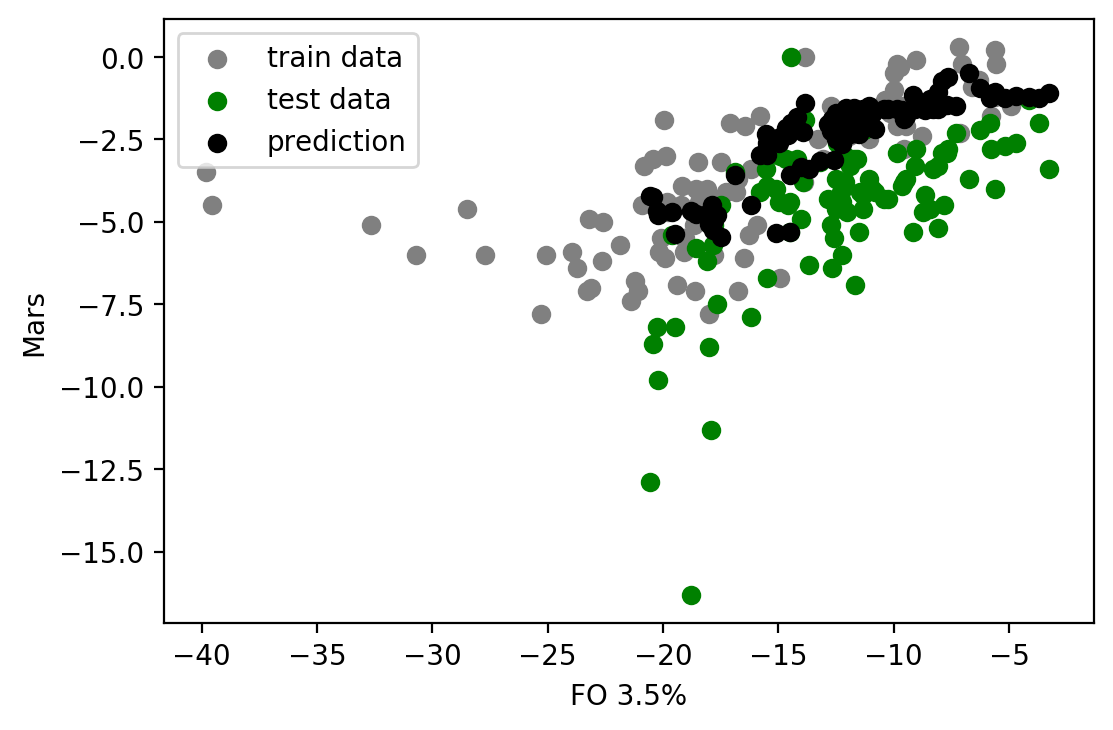

Mean squared error: 0.63
Feature ranking:
Feature FO 3.5% (0.712375)
Feature Maya USGC (0.287625)


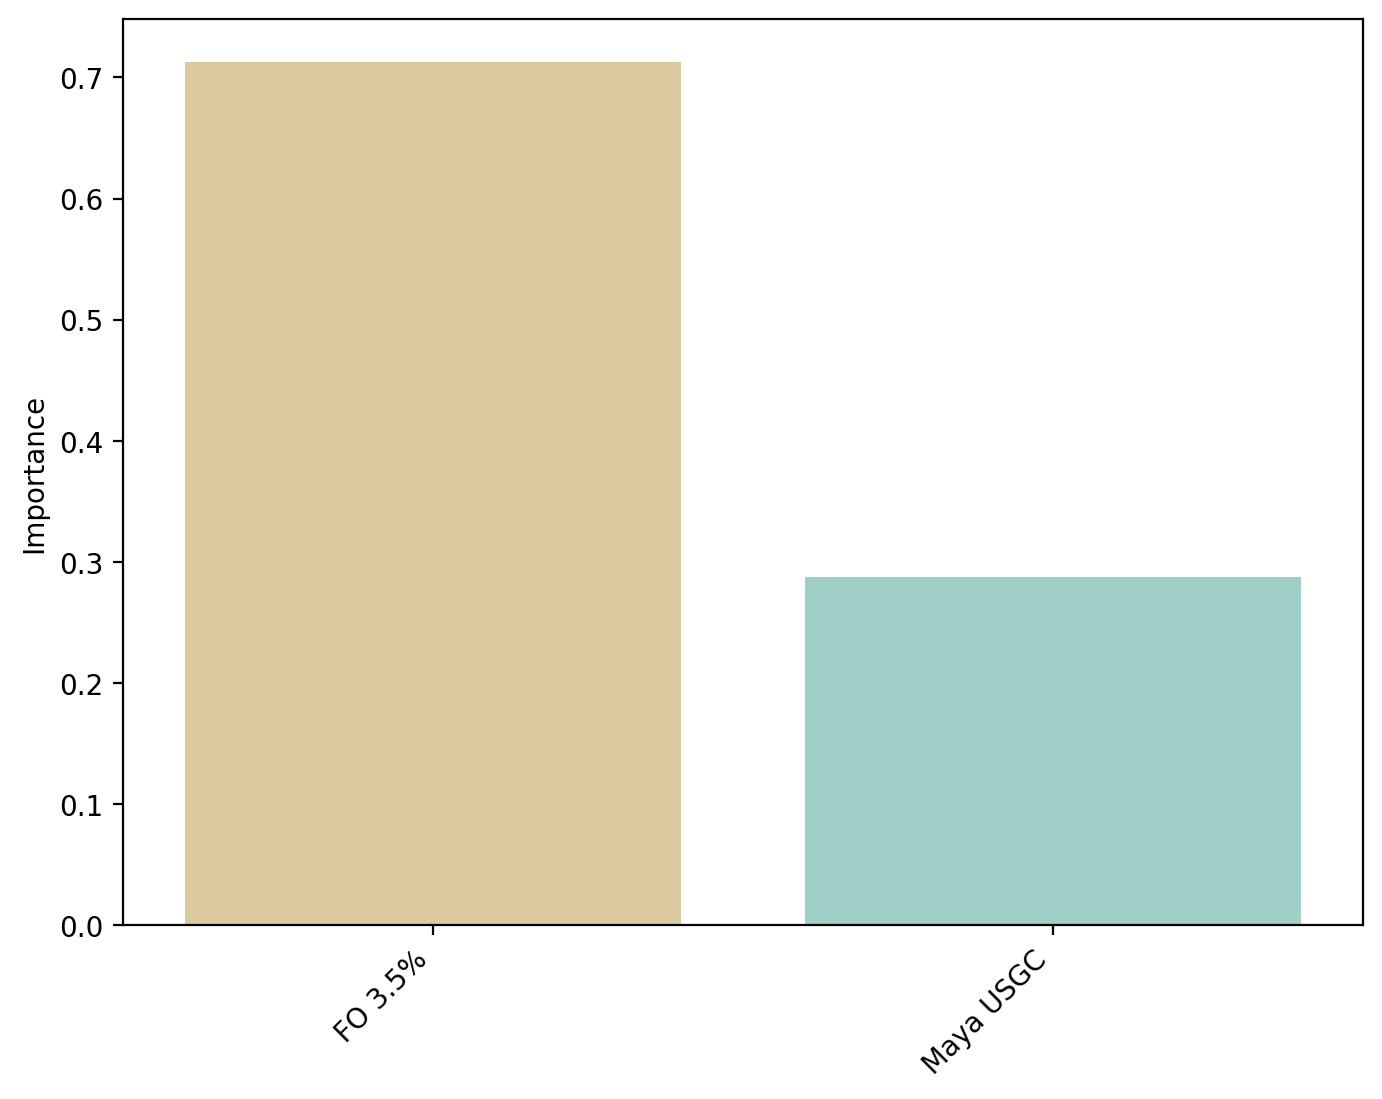

In [59]:
train_combi = combi.iloc[46:140,1:]
test_combi = combi.iloc[141:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["FO 3.5%","Maya USGC"]]
y_train=train_combi["Mars"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["FO 3.5%","Maya USGC"]]
y_test=test_combi["Mars"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["FO 3.5%"],y_train,   color='grey')
plt_test=plt.scatter(x_test["FO 3.5%"],y_test,   color='green')
plt_pred=plt.scatter(x_test["FO 3.5%"], y_pred,  color='black')



plt.xlabel("FO 3.5%")
plt.ylabel("Mars")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [60]:
#How to input data into trained model 

data =  {'FO 3.5%':[-7.4],'Maya USGC':[-5.675]}
data_df = pd.DataFrame(data)
y_pred=regressor.predict(data_df)
print(y_pred)

[-0.58766268]


In [28]:
pred_mayaE = combi["Dubai"] + 0.397436545016001*(combi["FO 3.5%"]) + 0.000372657746925089*combi["Dubai"]*np.power(combi["FO 3.5%"],2) - 3.89483828551919 - 0.0101406372095834*np.power(combi["Dubai"],4) - 0.0903722928130744*np.power(combi["Dubai"],3)

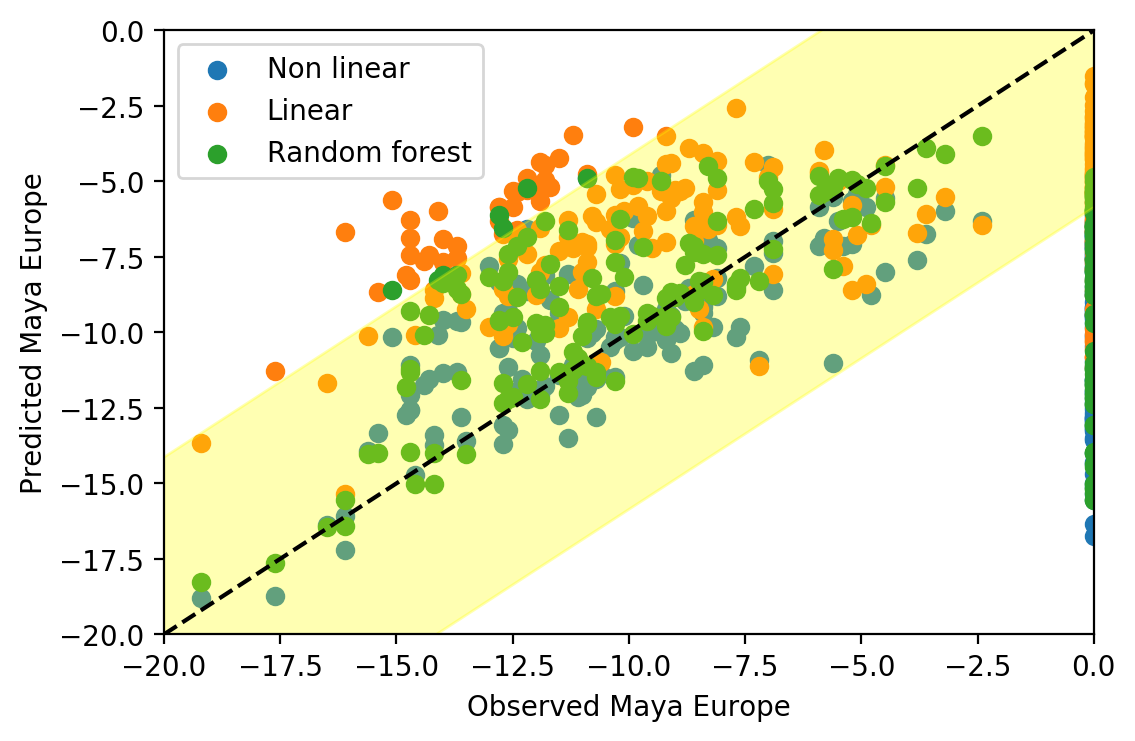

In [48]:
plt.rcParams['figure.dpi'] = 200
k1= combi["Dubai"]
k2= combi["FO 3.5%"]
linear_mayaE = regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2
plt_nl=plt.scatter(combi["Maya Europe"],pred_mayaE)
plt_l =plt.scatter(combi["Maya Europe"],linear_mayaE)



x_all=combi[["Dubai","FO 3.5%"]] 
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Maya Europe"],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Maya Europe"]), pop_mean-np.std(combi["Maya Europe"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Maya Europe')
plt.ylabel('Predicted Maya Europe')
plt.xlim([-20, 0])
plt.ylim([-20, 0])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

Text(0, 0.5, 'Maya Europe')

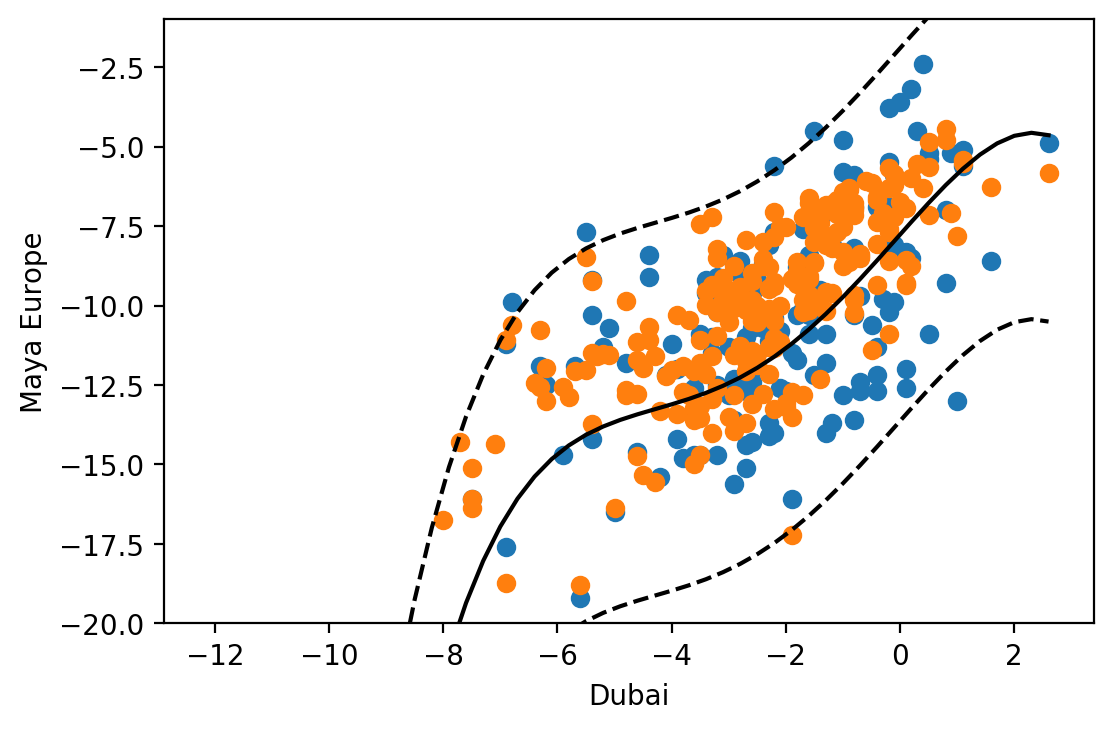

In [68]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dubai"],combi["Maya Europe"])
plt.scatter(combi["Dubai"],pred_mayaE)
plt.ylim([-20 ,-1])

Du = np.linspace(np.min(combi["Dubai"]),np.max(combi["Dubai"]),50)
FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)


P_mayaE = Du + 0.397436545016001*(FO35) + 0.000372657746925089*Du*np.power(FO35,2) - 3.89483828551919 - 0.0101406372095834*np.power(Du,4) - 0.0903722928130744*np.power(Du,3)

plt.plot(Du,P_mayaE,'k')
plt.plot(Du,P_mayaE+np.std(combi["Maya Europe"]),'--k')
plt.plot(Du,P_mayaE-np.std(combi["Maya Europe"]),'--k')

plt.xlabel('Dubai')
plt.ylabel('Maya Europe')

In [3]:
pred_ESPO = 11.3890705439685 + 0.199142482697583*np.power(combi["Gasoil"],2) + 0.00184730192306026*combi["Dubai"]*np.power(combi["Gasoil"],2) - 2.57509779249408*combi["Gasoil"] - 0.00455818401805749*np.power(combi["Gasoil"],3) - 0.0333384283920602*np.power(combi["Dubai"],2)


Text(0, 0.5, 'ESPO')

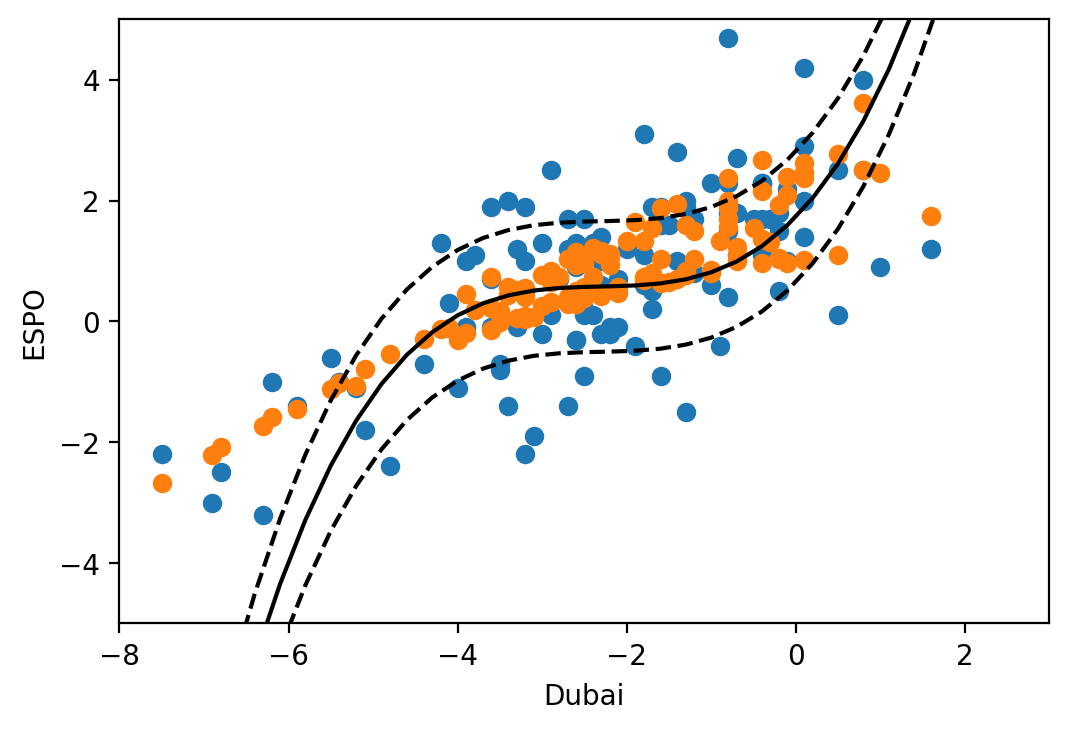

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dubai"].iloc[120:],combi["ESPO"].iloc[120:])
plt.scatter(combi["Dubai"].iloc[120:],pred_ESPO.iloc[120:])
plt.xlim([-8 ,3])
plt.ylim([-5 ,5])

Du = np.linspace(np.min(combi["Dubai"]),np.max(combi["Dubai"]),50)
Go = np.linspace(np.min(combi["Gasoil"]),np.max(combi["Gasoil"]),50)
URM = np.linspace(np.min(combi["Urals MED"]),np.max(combi["Urals MED"]),50)
Du=Du[::-1]

P_ESPO = 11.3890705439685 + 0.199142482697583*np.power(Go,2) + 0.00184730192306026*Du*np.power(Go,2) - 2.57509779249408*Go - 0.00455818401805749*np.power(Go,3) - 0.0333384283920602*np.power(Du,2)



plt.plot(Du,P_ESPO,'k')
plt.plot(Du,P_ESPO+np.std(combi["ESPO"]),'--k')
plt.plot(Du,P_ESPO-np.std(combi["ESPO"]),'--k')

plt.xlabel('Dubai')
plt.ylabel('ESPO')

In [27]:
Du = -0.51
Go = 14.16
URM = -0.1

P_ESPO = 11.3890705439685 + 0.199142482697583*np.power(Go,2) + 0.00184730192306026*Du*np.power(Go,2) - 2.57509779249408*Go - 0.00455818401805749*np.power(Go,3) - 0.0333384283920602*np.power(Du,2)

print(P_ESPO)

1.7158857940126762


In [29]:

X = combi[['Dubai','Gasoil','Urals MED']]
Y = combi['ESPO']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

New_Du = -0.51
New_Gasoil = 14.16
New_URM = -0.1
print ('Predicted Mars: \n', regr.predict([[New_Du, New_Gasoil, New_URM]]))

Intercept: 
 0.7194202550036548
Coefficients: 
 [0.2054775  0.02487161 0.04401825]
                            OLS Regression Results                            
Dep. Variable:                   ESPO   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     23.85
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.73e-13
Time:                        13:38:50   Log-Likelihood:                -321.59
No. Observations:                 236   AIC:                             651.2
Df Residuals:                     232   BIC:                             665.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 120

def f(db, m1,m2):
#def f(db):  
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    x = combi["Dubai"]
    y=regr.predict([[db, m1,m2]])
    #y=regr.predict([[db]])
    
    ax1.scatter(combi["Dubai"],combi["ESPO"])
    ax1.scatter(db,y, s=200)
    k1= combi["Dubai"]
    k2= combi["Gasoil"]
    k3= combi["Urals MED"]
    ax2.scatter(combi["ESPO"], regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 )
    #ax2.scatter(brdiff["Bonny light"], regr.intercept_+ regr.coef_[0]*k1 )
    ax2.set_xlim([-4 , 5])
    ax2.set_ylim([-4, 5])
    ax1.set_xlabel("Dubai")
    ax1.set_ylabel("ESPO diff")
    ax2.set_xlabel("Historic ESPO diff")
    ax2.set_ylabel("Predicted ESPO diff")
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
    
    
    print("predicted Maya Europe is", y )

#interactive_plot = interactive(f, db=(10,150,1))
interactive_plot = interactive(f, db=(-5,5,0.1), m1=(-20, 20, 0.1),m2=(-5, 5, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='db', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

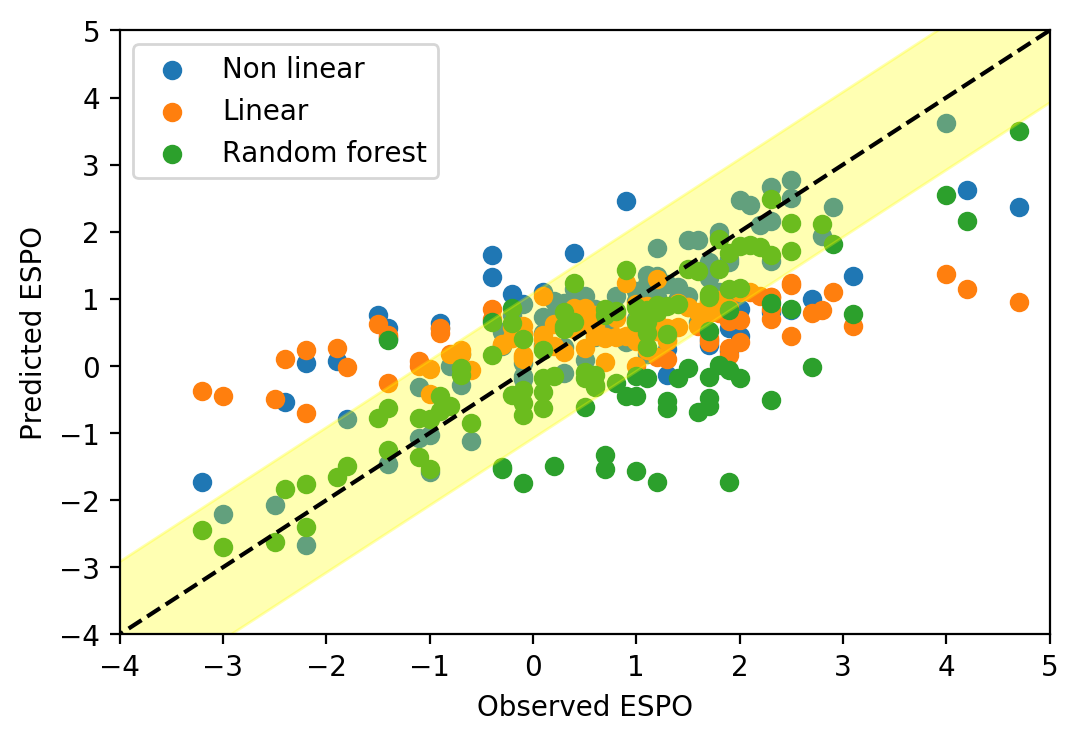

In [41]:
plt.rcParams['figure.dpi'] = 200
k1= combi["Dubai"].iloc[120:]
k2= combi["Gasoil"].iloc[120:]
k3= combi["Urals NWE"].iloc[120:]
linear_ESPO = regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3
plt_nl=plt.scatter(combi["ESPO"].iloc[120:],pred_ESPO.iloc[120:])
plt_l =plt.scatter(combi["ESPO"].iloc[120:],linear_ESPO)



x_all=combi[["Dubai","Gasoil","Urals NWE"]].iloc[120:]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["ESPO"].iloc[120:],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["ESPO"]), pop_mean-np.std(combi["ESPO"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed ESPO')
plt.ylabel('Predicted ESPO')
plt.xlim([-4, 5])
plt.ylim([-4, 5])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [5]:
pred_Mars =-1.64696713946646 - 0.0220607646182852*(combi["Maya USGC"])*combi["FO 3.5%"] - 0.000212150983747174*np.power(combi["FO 3.5%"],3) - 0.000238111245249621*np.power(combi["Maya USGC"],3)

Text(0, 0.5, 'Mars')

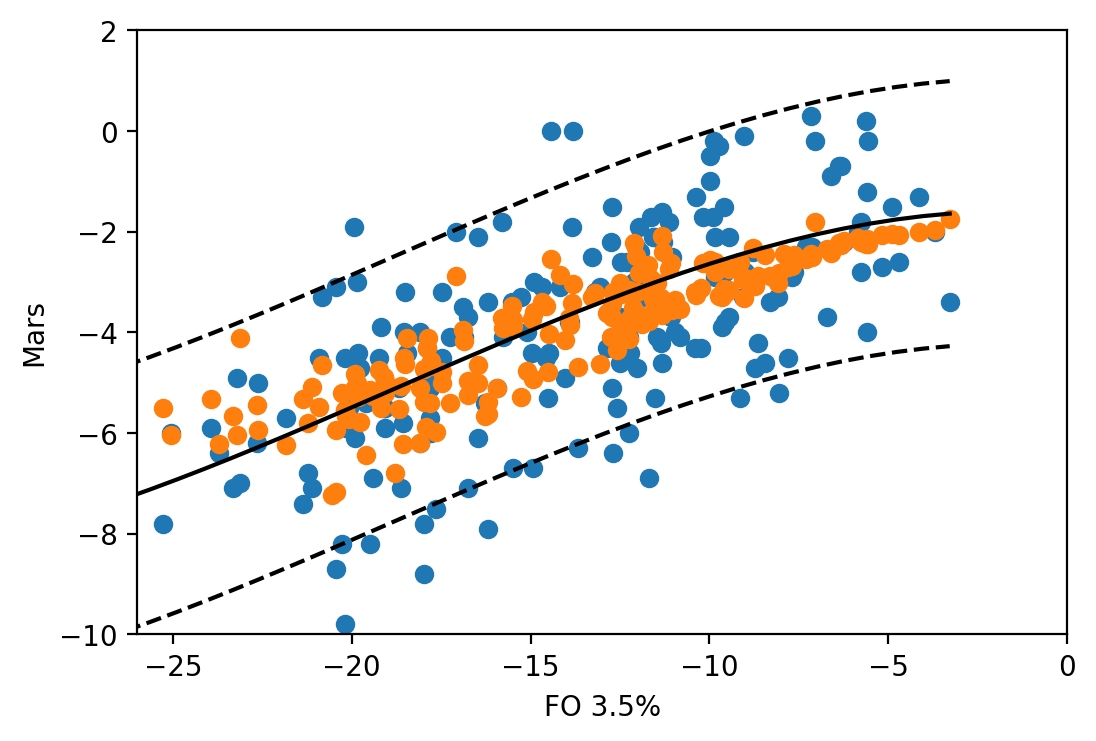

In [7]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"].iloc[46:],combi["Mars"].iloc[46:])
plt.scatter(combi["FO 3.5%"].iloc[46:],pred_Mars.iloc[46:])
plt.xlim([-26 ,0])
plt.ylim([-10 ,2])

MU = np.linspace(np.min(combi["Maya USGC"]),np.max(combi["Maya USGC"]),50)

FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)


P_Mars =-1.64696713946646 - 0.0220607646182852*(MU)*FO35 - 0.000212150983747174*np.power(FO35,3) - 0.000238111245249621*np.power(MU,3)

plt.plot(FO35,P_Mars,'k')
plt.plot(FO35,P_Mars+np.std(combi["Mars"]),'--k')
plt.plot(FO35,P_Mars-np.std(combi["Mars"]),'--k')

plt.xlabel('FO 3.5%')
plt.ylabel('Mars')

In [55]:
MU = -5.67

FO35 = -7.42


P_Mars =-1.64696713946646 - 0.0220607646182852*(MU)*FO35 - 0.000212150983747174*np.power(FO35,3) - 0.000238111245249621*np.power(MU,3)
print(P_Mars)

-2.4450228600677364


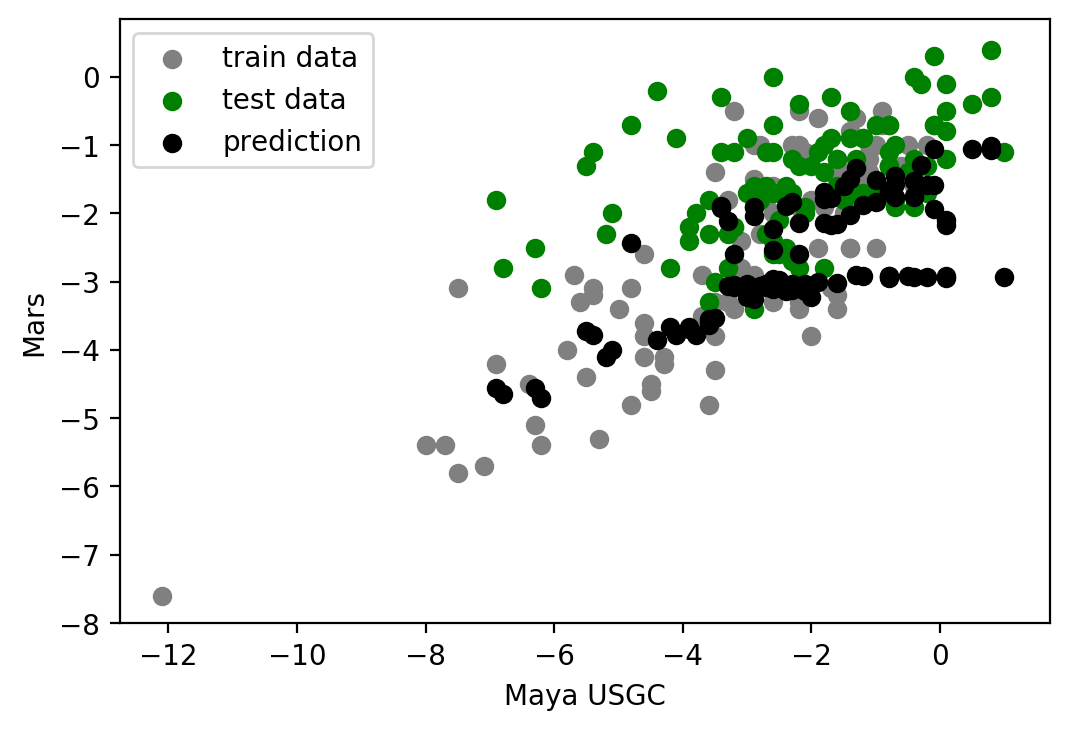

Mean squared error: 0.17
Feature ranking:
Feature Dubai (0.217781)
Feature FO 1% (0.473987)
Feature FO 3.5% (0.308232)


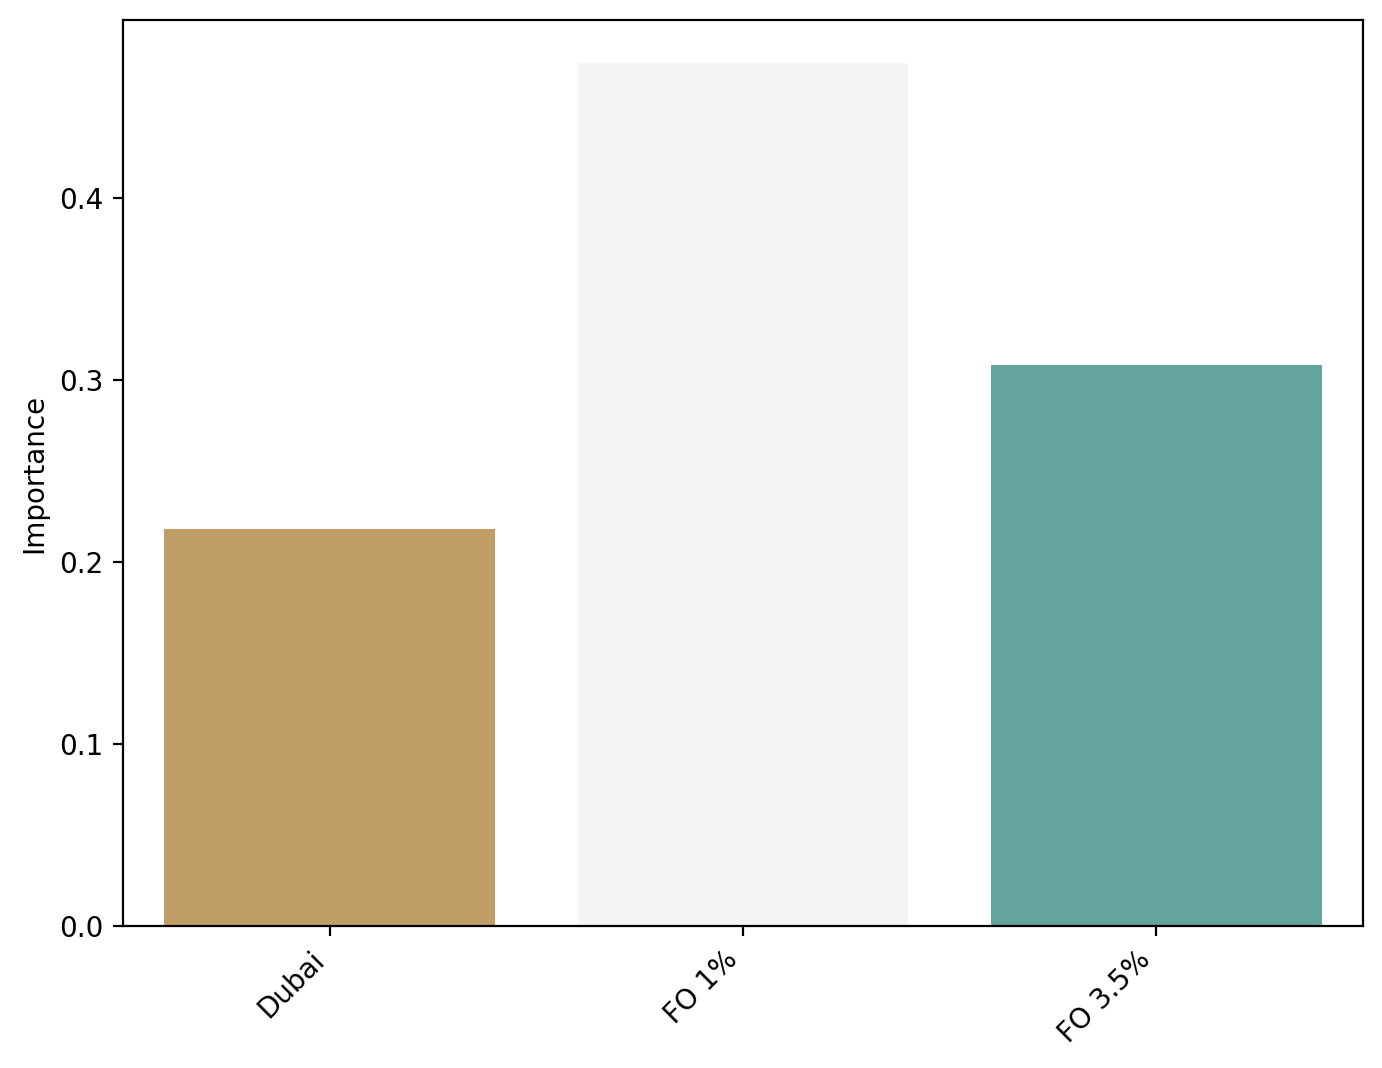

In [35]:
train_combi = combi.iloc[:100,1:]
test_combi = combi.iloc[-100:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dubai","FO 1%", "FO 3.5%"]]
y_train=train_combi["Urals NWE"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dubai","FO 1%", "FO 3.5%"]]
y_test=test_combi["Urals NWE"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dubai"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dubai"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dubai"], y_pred,  color='black')



plt.xlabel("Maya USGC")
plt.ylabel("Mars")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [36]:

data =  {'FO 3.5%':[-7.4],'Dubai':[-0.51],'FO 1%':[-1.28]}
data_df = pd.DataFrame(data)
y_pred=regressor.predict(data_df)
print(y_pred)

[-1.43639124]


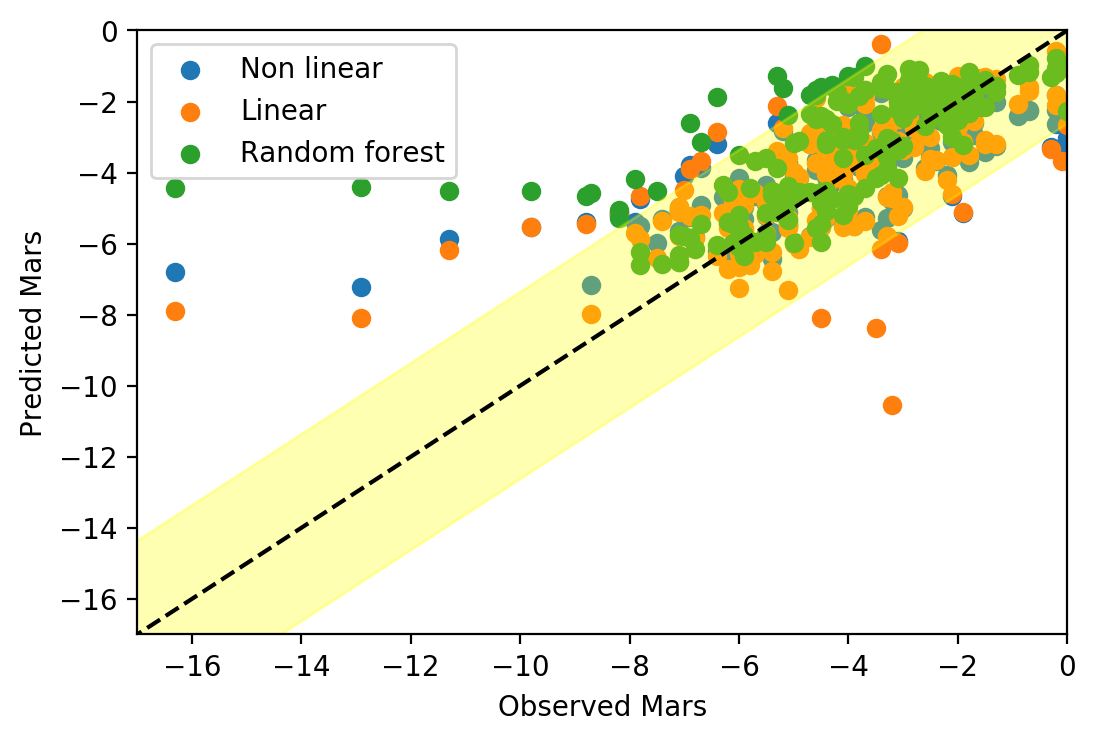

In [13]:
plt.rcParams['figure.dpi'] = 200
k1= combi["Maya USGC"].iloc[50:]
k2= combi["FO 3.5%"].iloc[50:]
linear_mars = regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2
plt_nl=plt.scatter(combi["Mars"].iloc[50:],pred_Mars.iloc[50:])
plt_l =plt.scatter(combi["Mars"].iloc[50:],linear_mars)



x_all=combi[["Maya USGC","FO 3.5%","FO 1%"]].iloc[50:]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Mars"].iloc[50:],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Mars"]), pop_mean-np.std(combi["Mars"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Mars')
plt.ylabel('Predicted Mars')
plt.xlim([-17, 0])
plt.ylim([-17, 0])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [10]:
pred_UralN =  0.283335353802878*combi["Dubai"] + 0.0438064617068955*combi["FO 3.5%"] + 0.00320839301327694*combi["Dubai"]*np.power(combi["FO 1%"],2) - 0.511831158401274 - 0.00194313007342261*combi["Dubai"]*combi["FO 3.5%"]*combi["FO 1%"]

Text(0, 0.5, 'Urals NWE')

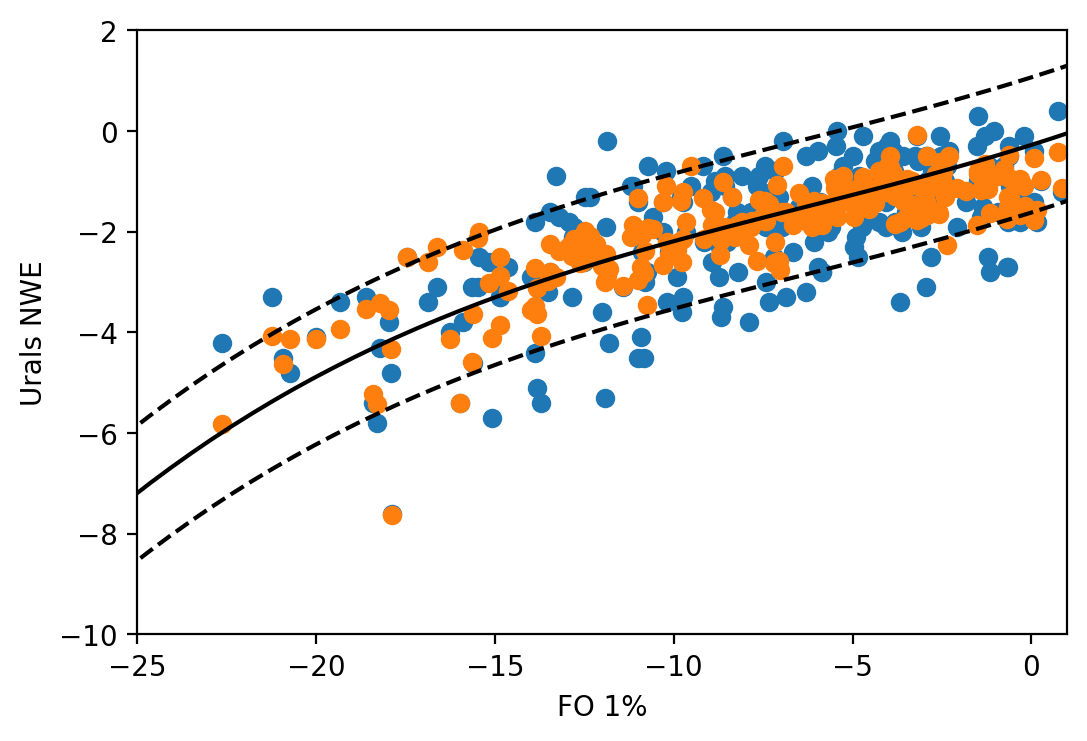

In [13]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 1%"],combi["Urals NWE"])
plt.scatter(combi["FO 1%"],pred_UralN)
plt.xlim([-25 ,1])
plt.ylim([-10 ,2])

FO1 = np.linspace(np.min(combi["FO 1%"]),np.max(combi["FO 1%"]),50)

FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)
Du = np.linspace(np.min(combi["Dubai"]),np.max(combi["Dubai"]),50)


P_UralN =  0.283335353802878*Du + 0.0438064617068955*FO35 + 0.00320839301327694*Du*np.power(FO1,2) - 0.511831158401274 - 0.00194313007342261*Du*FO35*FO1
plt.plot(FO1,P_UralN,'k')
plt.plot(FO1,P_UralN+np.std(combi["Urals NWE"]),'--k')
plt.plot(FO1,P_UralN-np.std(combi["Urals NWE"]),'--k')

plt.xlabel('FO 1%')
plt.ylabel('Urals NWE')

In [16]:
FO1 = -1.28
FO35 = -7.42
Du = -0.51

P_UralN =  0.283335353802878*Du + 0.0438064617068955*FO35 + 0.00320839301327694*Du*np.power(FO1,2) - 0.511831158401274 - 0.00194313007342261*Du*FO35*FO1
print(P_UralN)

-0.9746449297589898


In [17]:

X = combi[['Dubai','FO 1%','FO 3.5%']]
Y = combi['Urals NWE']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

New_Du = -0.51
New_Gasoil = 14.16
New_URM = -0.1
print ('Predicted Mars: \n', regr.predict([[New_Du, New_Gasoil, New_URM]]))

Intercept: 
 -0.4767004611989121
Coefficients: 
 [ 0.34365769  0.09915551 -0.00997949]
                            OLS Regression Results                            
Dep. Variable:              Urals NWE   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     130.9
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.25e-49
Time:                        12:57:29   Log-Likelihood:                -287.58
No. Observations:                 236   AIC:                             583.2
Df Residuals:                     232   BIC:                             597.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 120

def f(db, m1,m2):
#def f(db):  
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    x = combi["FO 1%"]
    y=regr.predict([[db, m1,m2]])
    #y=regr.predict([[db]])
    
    ax1.scatter(combi["FO 1%"],combi["Urals NWE"])
    ax1.scatter(db,y, s=200)
    k1= combi["Dubai"]
    k2= combi["FO 1%"]
    k3= combi["FO 3.5%"]
    ax2.scatter(combi["Urals NWE"], regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 )
    #ax2.scatter(brdiff["Bonny light"], regr.intercept_+ regr.coef_[0]*k1 )
    ax2.set_xlim([-8 , 1])
    ax2.set_ylim([-8, 1])
    ax1.set_xlabel("FO 1%")
    ax1.set_ylabel("Urals NWE diff")
    ax2.set_xlabel("Historic Urals NWE diff")
    ax2.set_ylabel("Predicted Urals NWE diff")
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
    
    
    print("predicted Urals NWE is", y )

#interactive_plot = interactive(f, db=(10,150,1))
interactive_plot = interactive(f, db=(-5,5,0.1), m1=(-3, 3, 0.1),m2=(-8, 8, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='db', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

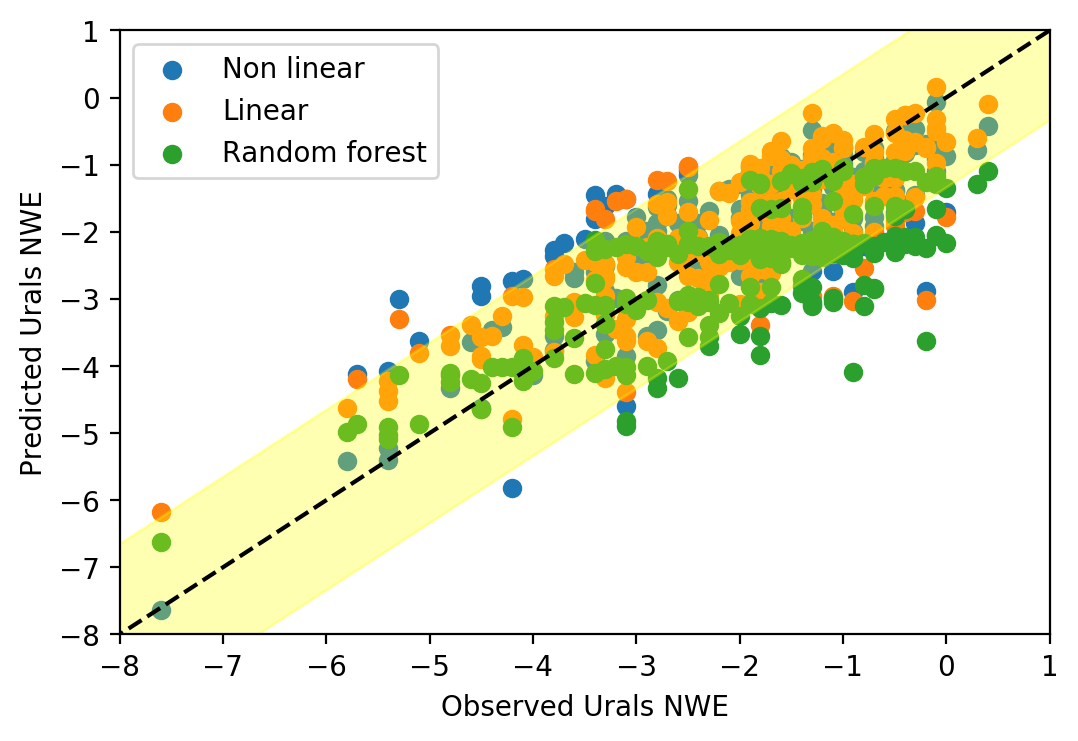

In [34]:
plt.rcParams['figure.dpi'] = 200

k1= combi["Dubai"]
k2= combi["FO 1%"]
k3= combi["FO 3.5%"]
linear_UralN=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 

plt_nl=plt.scatter(combi["Urals NWE"],pred_UralN)
plt_l =plt.scatter(combi["Urals NWE"],linear_UralN)



x_all=combi[["Dubai","FO 3.5%","FO 1%"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Urals NWE"],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Urals NWE"]), pop_mean-np.std(combi["Urals NWE"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Urals NWE')
plt.ylabel('Predicted Urals NWE')
plt.xlim([-8, 1])
plt.ylim([-8, 1])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()